### Web-Scrapping medical condtions and its respective symptoms

The following code shows the webscrapping of diverse medical conditions ad its symptoms from wikipedia databases. The way how this code works is due to the general from of wikipedia of presenting conditions. Usually, wikipedia presents health conditions by sections with an overview and an information box for general information (see figure 1). The information box is a table that carries characteristics of the condition such as, speciality, symptoms, prevention, diagnosis, complication, etc..    

<table class="infobox"><tbody><tr><th class="infobox-above" colspan="2" style="background:#ccc">Hepatitis</th></tr><tr><td class="infobox-full-data" colspan="2"><span class="mw-default-size" typeof="mw:File/Frameless"><a class="mw-file-description" href="/wiki/File:Alcoholic_hepatitis.jpg"><img class="mw-file-element" data-file-height="512" data-file-width="768" decoding="async" height="147" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/72/Alcoholic_hepatitis.jpg/220px-Alcoholic_hepatitis.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/72/Alcoholic_hepatitis.jpg/330px-Alcoholic_hepatitis.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/72/Alcoholic_hepatitis.jpg/440px-Alcoholic_hepatitis.jpg 2x" width="220"/></a></span></td></tr><tr><td class="infobox-full-data" colspan="2"><a href="/wiki/Alcoholic_hepatitis" title="Alcoholic hepatitis">Alcoholic hepatitis</a> as seen with a microscope, showing fatty changes (white circles), remnants of dead liver cells, and <a class="mw-redirect" href="/wiki/Mallory_bodies" title="Mallory bodies">Mallory bodies</a> (twisted-rope shaped inclusions within some liver cells). (<a href="/wiki/H%26E_stain" title="H&amp;E stain">H&amp;E stain</a>)</td></tr><tr><th class="infobox-label" scope="row"><a href="/wiki/Medical_specialty" title="Medical specialty">Specialty</a></th><td class="infobox-data"><a class="mw-redirect" href="/wiki/Infectious_disease_(medical_specialty)" title="Infectious disease (medical specialty)">Infectious disease</a>, <a href="/wiki/Gastroenterology" title="Gastroenterology">gastroenterology</a>, <a href="/wiki/Hepatology" title="Hepatology">hepatology</a></td></tr><tr><th class="infobox-label" scope="row"><a href="/wiki/Signs_and_symptoms" title="Signs and symptoms">Symptoms</a></th><td class="infobox-data"><a href="/wiki/Jaundice" title="Jaundice">Yellowish skin</a>, poor appetite, abdominal pain<sup class="reference" id="cite_ref-MedLine2016_1-0"><a href="#cite_note-MedLine2016-1">[1]</a></sup><sup class="reference" id="cite_ref-WHO2016QA_2-0"><a href="#cite_note-WHO2016QA-2">[2]</a></sup></td></tr><tr><th class="infobox-label" scope="row"><a href="/wiki/Complication_(medicine)" title="Complication (medicine)">Complications</a></th><td class="infobox-data"><a href="/wiki/Cirrhosis" title="Cirrhosis">Scarring of the liver</a>, <a href="/wiki/Liver_failure" title="Liver failure">liver failure</a>, <a href="/wiki/Liver_cancer" title="Liver cancer">liver cancer</a><sup class="reference" id="cite_ref-NIH2016_3-0"><a href="#cite_note-NIH2016-3">[3]</a></sup></td></tr><tr><th class="infobox-label" scope="row">Duration</th><td class="infobox-data">Short term or long term<sup class="reference" id="cite_ref-MedLine2016_1-1"><a href="#cite_note-MedLine2016-1">[1]</a></sup></td></tr><tr><th class="infobox-label" scope="row">Causes</th><td class="infobox-data"><a class="mw-redirect" href="/wiki/Viruses" title="Viruses">Viruses</a>, <a href="/wiki/Ethanol" title="Ethanol">alcohol</a>, toxins, autoimmune<sup class="reference" id="cite_ref-WHO2016QA_2-1"><a href="#cite_note-WHO2016QA-2">[2]</a></sup><sup class="reference" id="cite_ref-NIH2016_3-1"><a href="#cite_note-NIH2016-3">[3]</a></sup></td></tr><tr><th class="infobox-label" scope="row">Prevention</th><td class="infobox-data">Vaccination (for viral hepatitis),<sup class="reference" id="cite_ref-WHO2016QA_2-2"><a href="#cite_note-WHO2016QA-2">[2]</a></sup> avoiding excessive alcohol</td></tr><tr><th class="infobox-label" scope="row">Treatment</th><td class="infobox-data">Medication, <a class="mw-redirect" href="/wiki/Liver_transplant" title="Liver transplant">liver transplant</a><sup class="reference" id="cite_ref-MedLine2016_1-2"><a href="#cite_note-MedLine2016-1">[1]</a></sup><sup class="reference" id="cite_ref-Trans2012_4-0"><a href="#cite_note-Trans2012-4">[4]</a></sup></td></tr><tr><th class="infobox-label" scope="row">Frequency</th><td class="infobox-data">&gt; 500 million cases<sup class="reference" id="cite_ref-NIH2016_3-2"><a href="#cite_note-NIH2016-3">[3]</a></sup></td></tr><tr><th class="infobox-label" scope="row">Deaths</th><td class="infobox-data">&gt; One million a year<sup class="reference" id="cite_ref-NIH2016_3-3"><a href="#cite_note-NIH2016-3">[3]</a></sup></td></tr></tbody></table>

<div style="text-align: center;">
    Figure 1.- Hepatitis disease wikipedia information box shown as an example.
</div>


In [60]:
#Importing libraries
import re
import csv
import json
import requests
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from itertools import combinations
from collections import Counter

In [10]:
#Function for filtering only the links that have an infobox with symptoms.
def has_symptoms_table(url):
    try:
        #Obtaining the website content
        response = requests.get(url) 
        soup = BeautifulSoup(response.text, 'html.parser')

        #Finding the infobox from the websites
        tables = soup.find('table', class_="infobox")

        #Looking in all the infobox if there is a Symptoms section
        for table in tables:
            if table.find(text='Symptoms') or table.find(text='symptoms'):
                
                #Output of the function
                return True
        
        #If we do not find symptoms sections
        return False
    except Exception as e:
        return False

In [11]:
#Creating the empty dictionary were we will append our disease-symptoms
sympt_global = {}

#Defining the function that will append the symptoms scrapped into a dictionary
def create_symptoms_dict(url):
    
    try:
        #Obtaining the website content
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        #Finding the infobox from the websites
        tables = soup.find('table', class_="infobox")

        #Looking in all the infobox if there is a Symptoms section
        for table in tables:
            if table.find(text='Symptoms') or table.find(text='symptoms'):
                
                #The title of the website is the name of the disease or disorder
                title = soup.find("span", class_="mw-page-title-main").text
                
                #Scrapping the text next to the word "Symptoms" from the infobox
                symptoms_row = soup.find("th", text="Symptoms").find_next_sibling("td").get_text(strip=True)
                
                #Splitting the total string into different strings separated by ","s
                elements = symptoms_row.split(",")
                
                #"Making them" strings separated by commas
                #We do this for the dictionary save each symptom as a different value
                formated_chain = ', '.join(['"' + element + '"' for element in elements])
                
                #Creating the local dictionary
                local_sympt = { title : formated_chain }
                
                #Calling the global variable
                global sympt_global
                
                #Updating this value into the global symptom dictionary
                sympt_global.update(local_sympt)
                
                #Output of the function
                return local_sympt
        
        #If we do not find symptoms table sections
        return False
    except Exception as e:
        return False

In [14]:
#This function will join everything toguether, since the original list of conditions into the dictionaries 
#The difference between this function and the previous ones is that this is for list of diseases, not for one. 

def scrapp_data(url):
    #Obtaining the website content
    response = requests.get(url)
    
    #If the response is not an website error...
    if response.status_code == 200: #then...
        #Getting the website html
        soup = BeautifulSoup(response.text, 'html.parser')
        
        #Finding all the unordered lists <ul> of the website
        ul_elements = soup.find_all('ul')
        
        # Iterar sobre cada <ul> encontrado
        # Encontrar todos los enlaces dentro de este <ul>
        # Almacenar los enlaces encontrados en una lista
        
        #Creating and empty list for appending the links
        links = []    
        
        #For each unorderd list in our list of unordered lists...
        for ul in ul_elements:
            #find all the links
            links.extend(ul.find_all('a', href=True))
            
        #Now, from all the links we obtained above..
        for link in links:
            #Construct the complete url
            link_url = "https://en.wikipedia.org" + link['href']
            
            #Perform the actions only if the link has a table of symtoms
            if has_symptoms_table(link_url)==True:
                #print(f"This URL has a symptoms table: {link_url}") #Show the url on screen
                #Call the function for creating the dictionaty
                create_symptoms_dict(link_url)
                    

#### Lets obtain our dictionary of diseases and symptoms for each medical field. 

In [15]:
#Liver diseases
scrapp_data('https://en.wikipedia.org/wiki/Liver_disease#Liver_diseases')
#Show the number of diseases obtained
print("The dictionary till the moment with the liver diseases has a total of ", len(sympt_global), " number of conditions.")
#Show the dictionary
sympt_global

The dictionary till the moment with the liver diseases has a total of  20  number of conditions.


{'Metabolic dysfunction–associated steatotic liver disease': '"Asymptomaticin the early stagesIn later stages:*Deposits of cholesterol on the eye lids*Fatigue*Crusty red nodules* Digestive issuesLastly causesliver diseaseand eventuallyliver failure"',
 'Fasciolosis': '"Abdominal pain", " nausea", " yellow skin"',
 'Hepatitis': '"Yellowish skin", " poor appetite", " abdominal pain[1][2]"',
 'Autoimmune hepatitis': '"Oftenasymptomatic", "fatigue", "right upper abdominal pain", "anorexia", "nausea", "jaundice", "joint pain", "rash"',
 'Alcohol abuse': '"Relationship difficulties", " legal problems", " problems at work or school", "insomnia", "irritability", "chronic fatigue."',
 'Fatty liver disease': '"None", " tiredness", " pain in the upper right side of theabdomen[1][2]"',
 'Cirrhosis': '"Tiredness", "itchiness", "swelling in the lower legs", "jaundice", " easily bruising", "fluid build-up in the abdomen[1]"',
 'Metabolic syndrome': '"Obesity"',
 "Wilson's disease": '"Swelling of the 

In [16]:
#Adding heart disorders
scrapp_data("https://en.wikipedia.org/wiki/Outline_of_cardiology#Heart_disorders")
#Show the number of disorder obtained
print("The dictionary till the moment with the liver diseases, and heart diseases")
print("has a total of ", len(sympt_global), " number of conditions.")

The dictionary till the moment with the liver diseases, and heart diseases
has a total of  114  number of conditions.


{'Metabolic dysfunction–associated steatotic liver disease': '"Asymptomaticin the early stagesIn later stages:*Deposits of cholesterol on the eye lids*Fatigue*Crusty red nodules* Digestive issuesLastly causesliver diseaseand eventuallyliver failure"',
 'Fasciolosis': '"Abdominal pain", " nausea", " yellow skin"',
 'Hepatitis': '"Yellowish skin", " poor appetite", " abdominal pain[1][2]"',
 'Autoimmune hepatitis': '"Oftenasymptomatic", "fatigue", "right upper abdominal pain", "anorexia", "nausea", "jaundice", "joint pain", "rash"',
 'Alcohol abuse': '"Relationship difficulties", " legal problems", " problems at work or school", "insomnia", "irritability", "chronic fatigue."',
 'Fatty liver disease': '"None", " tiredness", " pain in the upper right side of theabdomen[1][2]"',
 'Cirrhosis': '"Tiredness", "itchiness", "swelling in the lower legs", "jaundice", " easily bruising", "fluid build-up in the abdomen[1]"',
 'Metabolic syndrome': '"Obesity"',
 "Wilson's disease": '"Swelling of the 

In [17]:
#Adding neurological conditions
scrapp_data("https://en.wikipedia.org/wiki/List_of_neurological_conditions_and_disorders")
#Show the number of conditions obtained
print("The dictionary till the moment with the liver diseases, heart diseases, and neurological conditions")
print("has a total of ", len(sympt_global), " number of conditions.")

The dictionary till the moment with the liver diseases, heart diseases, and neurological conditions
has a total of  247  number of conditions.


In [18]:
#Adding mental disorders
scrapp_data("https://en.wikipedia.org/wiki/List_of_mental_disorders")
#Show the number of disorders obtained
print("The dictionary till the moment with the liver diseases, heart diseases,")
print("mental disorders, and neurological conditions")
print("has a total of ", len(sympt_global), " number of conditions.")

The dictionary till the moment with the liver diseases, heart diseases,
mental disorders, and neurological conditions
has a total of  311  number of conditions.


In [19]:
#Adding voice disorders
scrapp_data("https://en.wikipedia.org/wiki/List_of_voice_disorders")
#Show the number of disorders obtained
print("The dictionary till the moment with the liver diseases, heart diseases, mental disorders")
print("voice disroders, and neurological conditions")
print("has a total of ", len(sympt_global), " number of conditions.")

The dictionary till the moment with the liver diseases, heart diseases, mental disorders
voice disroders, and neurological conditions
has a total of  313  number of conditions.


In [20]:
#Adding sexually transmitted diseases (STD)
scrapp_data("https://en.wikipedia.org/wiki/Sexually_transmitted_infection")
#Show the number of disorders obtained
print("The dictionary till the moment with the liver diseases, heart diseases, mental disorders")
print("voice disroders, STD's, and neurological conditions")
print("has a total of ", len(sympt_global), " number of conditions.")

The dictionary till the moment with the liver diseases, heart diseases, mental disorders
voice disroders, STD's, and neurological conditions
has a total of  342  number of conditions.


In [21]:
#Adding bone diseases
scrapp_data("https://en.wikipedia.org/wiki/Bone_disease")
#Show the number of disorders obtained
print("The dictionary till the moment with the liver diseases, heart diseases, mental disorders")
print("voice disroders, STD's, bone diseases, and neurological conditions")
print("has a total of ", len(sympt_global), " number of conditions.")

The dictionary till the moment with the liver diseases, heart diseases, mental disorders
voice disroders, STD's, bone diseases, and neurological conditions
has a total of  363  number of conditions.


In [27]:
#Adding gastro-interstinal (GI) disorders
scrapp_data("https://en.wikipedia.org/wiki/Category:Gastrointestinal_tract_disorders")
#Show the number of disorders obtained
print("The dictionary till the moment with the liver diseases, heart diseases, mental disorders")
print("voice disroders, STD's, GI, bone diseases, and neurological conditions")
print("has a total of ", len(sympt_global), " number of conditions.")

The dictionary till the moment with the liver diseases, heart diseases, mental disorders
voice disroders, STD's, GI, bone diseases, and neurological conditions
has a total of  732  number of conditions.


In [23]:
#Adding kidney diseases
scrapp_data("https://en.wikipedia.org/wiki/Category:Kidney_diseases")
#Show the number of disorders obtained
print("The dictionary till the moment with the liver diseases, heart diseases, mental disorders")
print("voice disroders, STD's, GI, bone diseases, kidney diseases, and neurological conditions")
print("has a total of ", len(sympt_global), " number of conditions.")

The dictionary till the moment with the liver diseases, heart diseases, mental disorders
voice disroders, STD's, GI, bone diseases, kidney diseases, and neurological conditions
has a total of  382  number of conditions.


In [24]:
#Adding muscular disorders
scrapp_data("https://en.wikipedia.org/wiki/Category:Muscular_disorders")
#Show the number of disorders obtained
print("The dictionary till the moment with the liver diseases, heart diseases, mental disorders")
print("voice disroders, STD's, GI, bone diseases, kidney diseases, and neurological conditions")
print("has a total of ", len(sympt_global), " number of conditions.")

The dictionary till the moment with the liver diseases, heart diseases, mental disorders
voice disroders, STD's, GI, bone diseases, kidney diseases, and neurological conditions
has a total of  400  number of conditions.


In [25]:
#Adding skin conditions
scrapp_data("https://en.wikipedia.org/wiki/List_of_skin_conditions")
#Show the number of disorders obtained
print("The dictionary till the moment with the liver diseases, heart diseases, mental disorders")
print("voice disroders, STD's, GI, bone diseases, kidney diseases, skin conditions,")
print("and neurological conditions")
print("has a total of ", len(sympt_global), " number of conditions.")
#Show the dictionary
sympt_global

The dictionary till the moment with the liver diseases, heart diseases, mental disorders
voice disroders, STD's, GI, bone diseases, kidney diseases, skin conditions,
and neurological conditions
has a total of  656  number of conditions.


{'Metabolic dysfunction–associated steatotic liver disease': '"Asymptomaticin the early stagesIn later stages:*Deposits of cholesterol on the eye lids*Fatigue*Crusty red nodules* Digestive issuesLastly causesliver diseaseand eventuallyliver failure"',
 'Fasciolosis': '"Abdominal pain", " nausea", " yellow skin"',
 'Hepatitis': '"Yellowish skin", " poor appetite", " abdominal pain[1][2]"',
 'Autoimmune hepatitis': '"Oftenasymptomatic", "fatigue", "right upper abdominal pain", "anorexia", "nausea", "jaundice", "joint pain", "rash"',
 'Alcohol abuse': '"Relationship difficulties", " legal problems", " problems at work or school", "insomnia", "irritability", "chronic fatigue."',
 'Fatty liver disease': '"None", " tiredness", " pain in the upper right side of theabdomen[1][2]"',
 'Cirrhosis': '"Tiredness", "itchiness", "swelling in the lower legs", "jaundice", " easily bruising", "fluid build-up in the abdomen[1]"',
 'Metabolic syndrome': '"Obesity"',
 "Wilson's disease": '"Swelling of the 

In [26]:
#Adding Hematologic diseases
scrapp_data("https://en.wikipedia.org/wiki/Hematologic_disease")
#Show the number of disorders obtained
print("The dictionary till the moment with the liver diseases, heart diseases, mental disorders")
print("voice disroders, STD's, GI, bone diseases, kidney diseases, skin conditions,")
print("and neurological conditions")
print("has a total of ", len(sympt_global), " number of conditions.")
#Show the dictionary
sympt_global    

The dictionary till the moment with the liver diseases, heart diseases, mental disorders
voice disroders, STD's, GI, bone diseases, kidney diseases, skin conditions,
and neurological conditions
has a total of  710  number of conditions.


{'Metabolic dysfunction–associated steatotic liver disease': '"Asymptomaticin the early stagesIn later stages:*Deposits of cholesterol on the eye lids*Fatigue*Crusty red nodules* Digestive issuesLastly causesliver diseaseand eventuallyliver failure"',
 'Fasciolosis': '"Abdominal pain", " nausea", " yellow skin"',
 'Hepatitis': '"Yellowish skin", " poor appetite", " abdominal pain[1][2]"',
 'Autoimmune hepatitis': '"Oftenasymptomatic", "fatigue", "right upper abdominal pain", "anorexia", "nausea", "jaundice", "joint pain", "rash"',
 'Alcohol abuse': '"Relationship difficulties", " legal problems", " problems at work or school", "insomnia", "irritability", "chronic fatigue."',
 'Fatty liver disease': '"None", " tiredness", " pain in the upper right side of theabdomen[1][2]"',
 'Cirrhosis': '"Tiredness", "itchiness", "swelling in the lower legs", "jaundice", " easily bruising", "fluid build-up in the abdomen[1]"',
 'Metabolic syndrome': '"Obesity"',
 "Wilson's disease": '"Swelling of the 

In [29]:
#Crea una copia
sympt_global1 = sympt_global.copy()

In [30]:
#The number of diseases is
len(sympt_global1 )

732

In [31]:
for enfermedad in sympt_global1 :
    sin_dobles = sympt_global1[enfermedad].replace('"', '')  # Eliminar comillas dobles
    lista_sintomas = sin_dobles.split(", ")  # Dividir la cadena en una lista usando comas como delimitador
    # Eliminar corchetes y su respectivo número y convertir a minúsculas
    lista_sintomas = [re.sub(r'\[\d+\]', '', sintoma).strip().lower() for sintoma in lista_sintomas]
    sympt_global1[enfermedad] = lista_sintomas

    
    
sympt_global1   

{'Metabolic dysfunction–associated steatotic liver disease': ['asymptomaticin the early stagesin later stages:*deposits of cholesterol on the eye lids*fatigue*crusty red nodules* digestive issueslastly causesliver diseaseand eventuallyliver failure'],
 'Fasciolosis': ['abdominal pain', 'nausea', 'yellow skin'],
 'Hepatitis': ['yellowish skin', 'poor appetite', 'abdominal pain'],
 'Autoimmune hepatitis': ['oftenasymptomatic',
  'fatigue',
  'right upper abdominal pain',
  'anorexia',
  'nausea',
  'jaundice',
  'joint pain',
  'rash'],
 'Alcohol abuse': ['relationship difficulties',
  'legal problems',
  'problems at work or school',
  'insomnia',
  'irritability',
  'chronic fatigue.'],
 'Fatty liver disease': ['none',
  'tiredness',
  'pain in the upper right side of theabdomen'],
 'Cirrhosis': ['tiredness',
  'itchiness',
  'swelling in the lower legs',
  'jaundice',
  'easily bruising',
  'fluid build-up in the abdomen'],
 'Metabolic syndrome': ['obesity'],
 "Wilson's disease": ['sw

'itchiness'

In [39]:
#Transporting our dictionary into a csv file 

#Defining the function
def write_csv(data_dict, i):
    
    #the name of the file created will be
    fname = f'conditions-symptoms-data{i}.csv'
    
    #creating the file
    with open(fname, 'w', encoding='utf-8', newline='') as f:
        
        #Making it csv
        wrtr = csv.writer(f)
        wrtr.writerow(['disease', 'symptoms'])
        
        #for each key and value in our dictionary
        for k, v in data_dict.items():
            wrtr.writerow([k, v])
            
#Calling the function            
write_csv(sympt_global1, 1)            

In [41]:
#Transporting our dictionary into a json file 

#defining the function
def write_json(data_dict, i):
    
    #the name of the file created will be
    fname = f'conditions-symptoms-data{i}.json'
    
    #creating the file
    with open(fname, 'w', encoding='utf-8') as f:
    
        #Making it json
        json.dump(data_dict, f, ensure_ascii=False, indent=4)
        
#Calling the function            
write_json(sympt_global1, 1)         

In [58]:
#A function to create an edgeslit
def dict_to_edgeslist(diccionario):
    array_claves = []
    for clave in diccionario:
        array_claves.append(diccionario[clave])
    array_claves = sum(array_claves, [])
    array_claves = set(array_claves)
    array_claves = list(array_claves)
    array_claves.sort()

    diccionario_sintomas = {elemento: [] for elemento in array_claves}
    for clave, lista_elementos in diccionario.items():
        for elemento in lista_elementos:
            diccionario_sintomas[elemento].append(clave)

    numero_coincidencias = []
    for clave in diccionario_sintomas:
        if len(diccionario_sintomas[clave]) > 1:
            numero_coincidencias.append(diccionario_sintomas[clave])

    conteo_sublistas = {}
    for sublista in numero_coincidencias:
        tupla_sublista = tuple(sublista)
        if tupla_sublista in conteo_sublistas:
            conteo_sublistas[tupla_sublista] += 1
        else:
            conteo_sublistas[tupla_sublista] = 1

    result_coincidencias = [(list(sublista), cantidad) for sublista, cantidad in conteo_sublistas.items()]

    combinaciones_claves = [tuple(sorted(comb)) for value in diccionario_sintomas.values() for comb in combinations(value, 2)]
    conteo_combinaciones = Counter(combinaciones_claves)
    result_pares = [([clave1, clave2], cantidad) for (clave1, clave2), cantidad in conteo_combinaciones.items()]

    columna_1 = [item[0][0] for item in result_pares]
    columna_2 = [item[0][1] for item in result_pares]
    columna_3 = [item[1] for item in result_pares]

    df = pd.DataFrame({'Disease 1': columna_1, 'Disease 2': columna_2, 'Weight': columna_3})
    return df

df1 = dict_to_edgeslist(sympt_global1)
df1

,Disease 1,Disease 2,Weight
0,Lesch–Nyhan syndrome,Premenstrual dysphoric disorder,1
1,Lesch–Nyhan syndrome,Page kidney,1
2,Page kidney,Premenstrual dysphoric disorder,1
3,Duodenal atresia,Gray baby syndrome,1
4,Fasciolosis,Hepatitis,1
...,...,...,...
8136,Hepatitis B,Liver cancer,1
8137,Liver cancer,Thalassemia,1
8138,Glucose-6-phosphate dehydrogenase deficiency,Liver cancer,1
8139,Cholangiocarcinoma,Thalassemia,1


In [65]:
df1.to_csv('disease-symptoms_edges-list.csv', index=False)

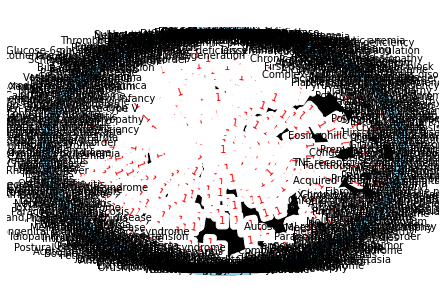

In [70]:
# Creamos un grafo no dirigido
G = nx.Graph()

# Añadimos los bordes con pesos al grafo
for index, row in df1.iterrows():
    G.add_edge(row['Disease 1'], row['Disease 2'], weight=row['Weight'])
# Visualizamos el grafo
pos = nx.circular_layout(G)  # Establecemos una disposición de los nodos
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}  # Etiquetas de los bordes

nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=100, edge_color='black', linewidths=1, font_size=10, arrows=False)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.show()

In [72]:
# Obtener todas las enfermedades únicas
diseases = set(df1['Disease 1']).union(set(df1['Disease 2']))

# Crear la matriz de adyacencia llena de ceros
adj_matrix = pd.DataFrame(0, index=diseases, columns=diseases)

# Iterar sobre las filas del DataFrame y actualizar la matriz con los pesos
for index, row in df1.iterrows():
    disease1 = row['Disease 1']
    disease2 = row['Disease 2']
    weight = row['Weight']
    adj_matrix.at[disease1, disease2] = weight
    adj_matrix.at[disease2, disease1] = weight  # Considerando la simetría de la matriz de adyacencia

print(adj_matrix)

                                              Urushiol-induced contact dermatitis  \
Urushiol-induced contact dermatitis                                             0   
Aortic dissection                                                               0   
Atrial septal defect                                                            0   
Blueberry muffin baby                                                           0   
Night terror                                                                    0   
...                                                                           ...   
Tropical sprue                                                                  0   
Glucose-6-phosphate dehydrogenase deficiency                                    0   
Acute proliferative glomerulonephritis                                          0   
Fever                                                                           0   
Varicose veins                                                   

In [73]:
adj_matrix.to_excel('matriz_adyacencia.xlsx')